# **Predicting Heart Disease Using Machine Learning**

This notebook looks into various Python-based machine learning and data science libraries in an attempt to build a machine learning capable of predicting whether or not someone has heart disease based on their medical attribute


We are going to take the Following approach:
1. Problem Evaluation
2. Data
3. Evaluation 
4. Features
5. Modelling 
6. Experimentation 

## **1. Problem Evaluation**

In a statement,
> Given clinical parameters about a patient we can predict whether or not they have heart disease?

## **2. Data**

The original data came from Cleaveland data from the UCI Machine Learning Reposotry: https://archive.ics.uci.edu/dataset/45/heart+disease

There is also a version of it available on Kaggle: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## **3. Evaluation**

The evaluation metric is something you might define at the start of a project.

Since machine learning is very experimental, you might say something like, 

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

The reason this is helpful is it provides a rough goal for a machine learning engineer or data scientist to work towards.

However, due to the nature of experimentation, the evaluation metric may change over time.


## **4. Features**

Features are different parts of the data. During this step, you'll want to start finding out what you can about the data.

One of the most common ways to do this, is to create a **data dictionary**.

### Heart Disease Data Dictionary

A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a **subject matter expert** (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

**Note:** No personal identifiable information (PPI) can be found in the dataset.

It's a good idea to save these to a Python dictionary or in an external file, so we can look at them later without coming back here.

## **Preparing the tools**

We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [2]:
# Import all the tools we need

# Regular EDA (Exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, RocCurveDisplay


## **Load Data**

In [3]:
df = pd.read_csv('heart-disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data Exploration ( Exploratory data analysis or EDA )

The goal here is to find out more about the data and become a subjesct matter expert on the dataset you're working with.
1. What questions are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from data and how do we deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# Let's findout how many of each class there 
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

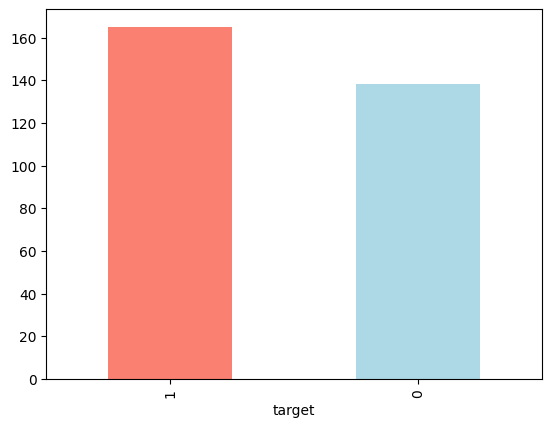

In [7]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to sex

In [11]:
df["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [12]:
# Compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


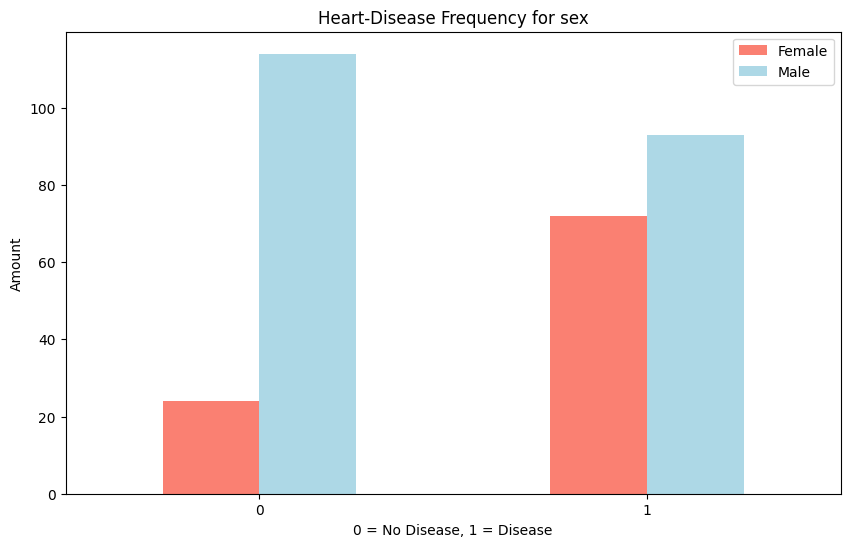

In [13]:
# Create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6),color=['salmon','lightblue'])

plt.title("Heart-Disease Frequency for sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

### Age Vs Max Heart Rate for Heart Disease

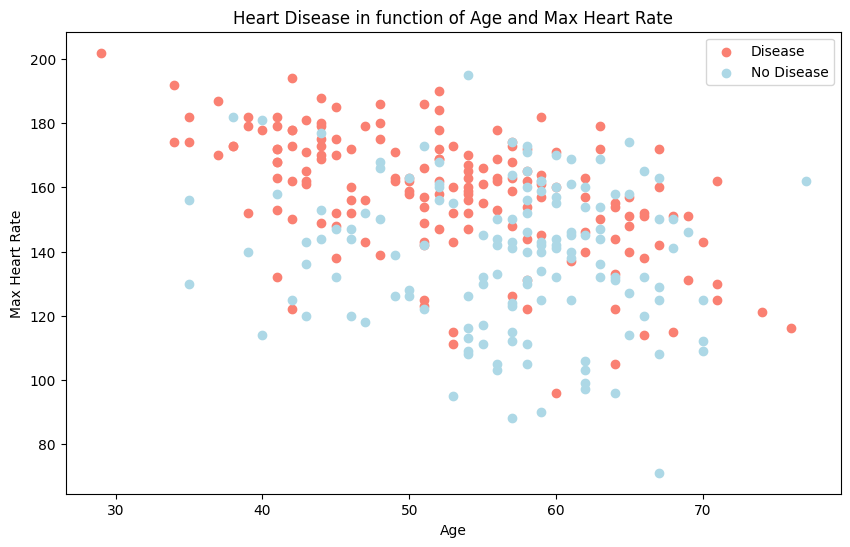

In [14]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            color="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            color="lightblue")

# add some helpful info 
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"]);

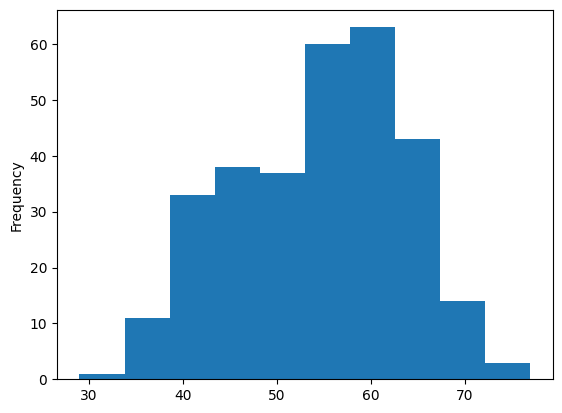

In [15]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

In [16]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


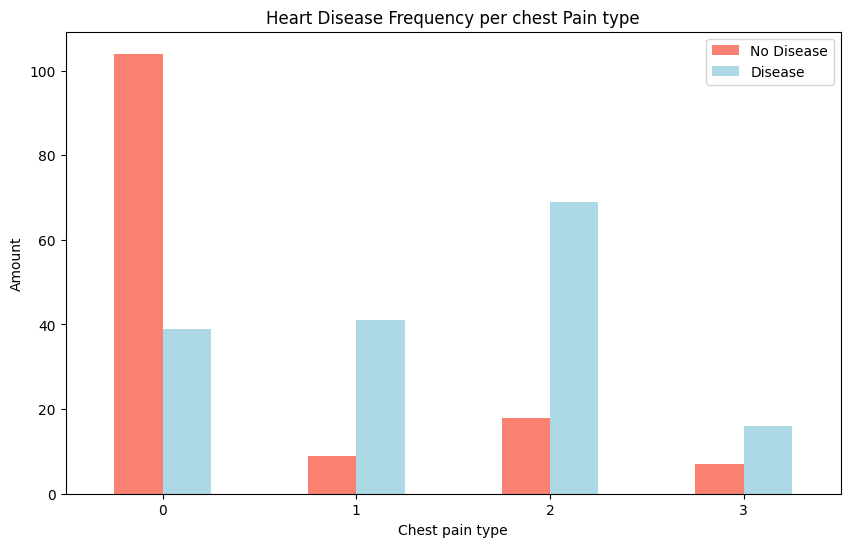

In [17]:
# Making crosstab more visual 
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon","lightblue"])

# Add some communication
plt.title("Heart Disease Frequency per chest Pain type")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
# Make a Corelation Matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


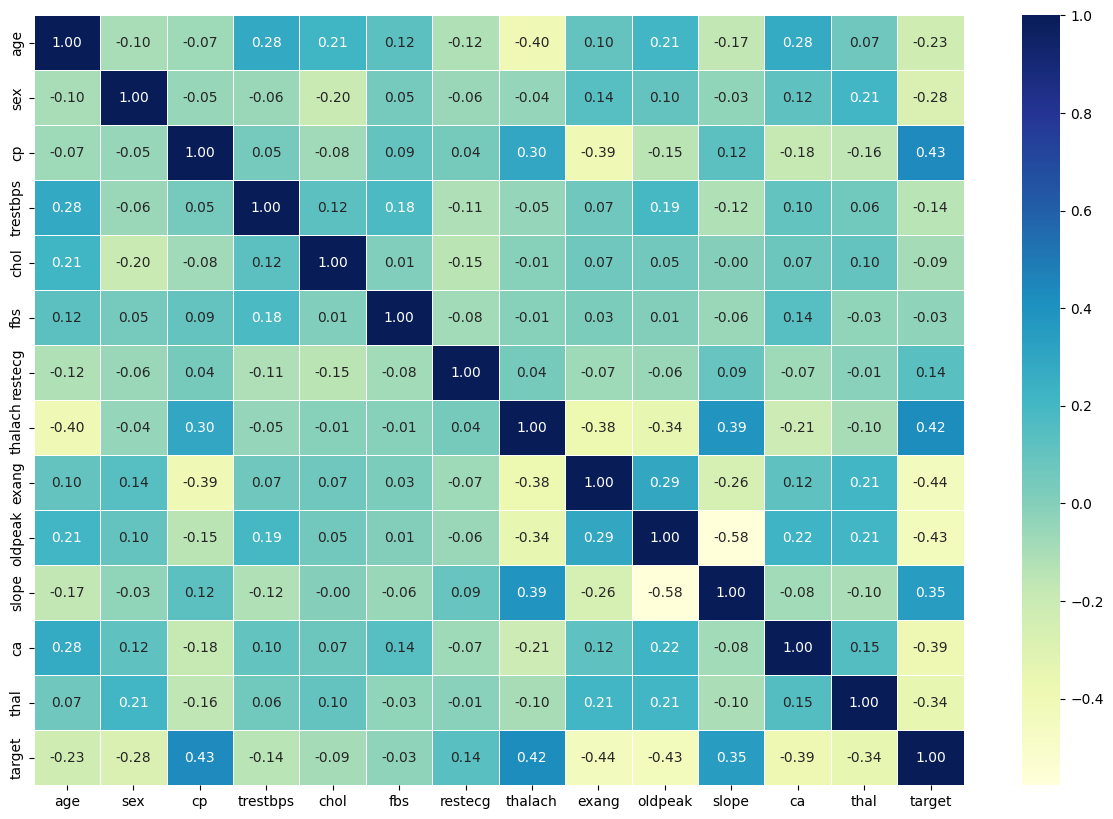

In [20]:
# Let's make out correlation matrix a little prettier
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

# bottom,top = ax.get_ylim()
# ax.set_ylim(bottom + 0.5,top - 0.5);

## **5. Modelling**

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
np.random.seed(42)

# Split data into X & Y
X = df.drop("target",axis=1)
Y = df["target"]

# Splitting data into train and test split
X_train,X_Test,Y_train,Y_Test = train_test_split(X,Y,test_size=0.2)

* Now we have got our data split into training and test split, its time to build a machine learning model.
* We will train it (Find patterns in it) on the training set & We will test it (Use the patterns) on the test set.


We are going to try 3 different machine learning models:
1. Logistic Regression.
2. K-Nearest Neighbour Classification
3. Random Forest Classification

In [23]:
# Putting models in a dictionary 
models = {"LogisticRegression":LogisticRegression(),
          "KNN":KNeighborsClassifier(),
          "RandomForestClassifier":RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models,X_train,X_Test,Y_train,Y_Test):
    '''
    Fits and evaluate given machine learning models
    models : A dict of different sklearn models
    '''
    
    # Setting random seed 
    np.random.seed(42)
    
    # Make a dictionary to keep the model score
    model_scores = {}
    
    # Loop through models
    for name,model in models.items():
        
        # Fit the model to the data 
        model.fit(X_train,Y_train)
        
        # Evaluate the model and append its score to model_scores 
        model_scores[name] = model.score(X_Test,Y_Test)
    return model_scores

In [24]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_Test=X_Test,
                             Y_train=Y_train,
                             Y_Test=Y_Test)
model_scores

c:\Users\Asus\Downloads\DS_ML\Heart-Disease-Project\Project_env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForestClassifier': 0.8360655737704918}

### **Model Comparing**

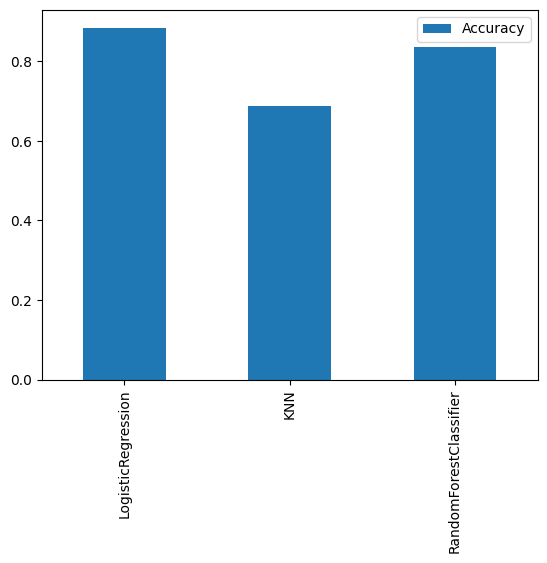

In [25]:
model_compare = pd.DataFrame(model_scores,index=["Accuracy"])
model_compare.T.plot.bar();

Now we've got out baseline models...and we know a model's first predictions aren't always what we should based out next steps off.

Let's look at the following:
* HyperParameter Tuning 
* Features Importance 
* Confusion Matrix
* Cross-Validation
* Precision 
* Recall
* F1 Score
* Classification Report 
* ROC Curve
* Area Under the Curve (AUC)

### **HyperParameter Tuning (By Hand)**

In [26]:
# Let's tune KNN

train_score = []
test_score = []

# Create a list of different values for n_neighbours
neighbours = range(1,21)

# Setup KNN Instance
knn = KNeighborsClassifier()

# Loop thorugh different n_neighbours
for i in neighbours:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train,Y_train)
    
    # Update the training Scores list
    train_score.append(knn.score(X_train,Y_train))
    
    # Update the test scores list
    test_score.append(knn.score(X_Test,Y_Test))

In [27]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [28]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN Score on the test data: 75.41%


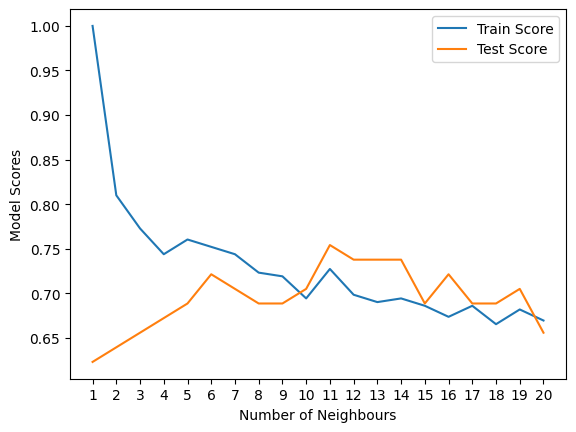

In [29]:
plt.plot(neighbours,train_score,label="Train Score")
plt.plot(neighbours,test_score,label="Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of Neighbours")
plt.ylabel("Model Scores")
plt.legend()

print(f"Maximum KNN Score on the test data: {max(test_score)*100:.2f}%")

### **HyperParameter Tuning with RandomisedSearchCV**

We are going to tune:
* Logistics Regression()
* RandomForestClassifier()
... Using RandomisedSearchCV

In [30]:
# Create a HyperParameter Grid for LogisticRegression 

log_reg_grid = {"C":np.logspace(-4,4,20),
                "solver":["liblinear"]}

# Create HyperParameter grid for RandomForestClassifier
rf_grid = {"n_estimators":np.arange(10,1000,50),
           "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)}

Now we've got randomised grids setup for each of our models,
let's tune them using RandomisedSearchCV...

In [31]:
# Tune LogisticRegression

np.random.seed(42)

# Setup Hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [32]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [33]:
rs_log_reg.score(X_Test,Y_Test)

0.8852459016393442

Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier

In [34]:
# Setup Random seed
np.random.seed(42)

# Setup random hyperparameter seacrh for RandomforestClassifier 
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit the HyperParameter for RandomforestClassifer
rs_rf.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [35]:
# Find the best parameters

rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [36]:
# Evaluate the randomized search RandomForestClassifier
rs_rf.score(X_Test,Y_Test)

0.8688524590163934

### **Hyperparameter tuning with GridSearchCV**

Since our LogisticsRegressionModel provides the best score so far, we will try and improve them agaim using GridSearchCV


In [37]:
# Different HyperParameter Grid for LogisticRegression 

log_reg_grid = {"C":np.logspace(-4,4,30),
                "solver":["liblinear"]}

# Setup grid hyperparameter seacrh for logisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv = 5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [38]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [39]:
# Evaluate the grid search LogisticsRegression Model
gs_log_reg.score(X_Test,Y_Test)

0.8852459016393442

## **6. Evaluating our tuned ML Classifier, Beyond accuracy**

* ROC Curve and AUC Score
* Confusion Matrix
* classification_report
* precision_score
* recall_score
* f1_score

and it would be great If cross_val_score was used where possible

In [40]:
# To make comparisons and evaluate our trained model, First we need to make predictions
Y_Preds = gs_log_reg.predict(X_Test)

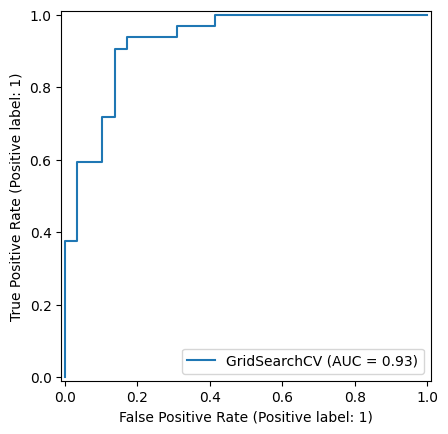

In [41]:
# plot ROC Curve and calculate AUC Metric
RocCurveDisplay.from_estimator(gs_log_reg, X_Test, Y_Test);

In [42]:
# Confusion Matrix
print(confusion_matrix(Y_Test,Y_Preds))

[[25  4]
 [ 3 29]]


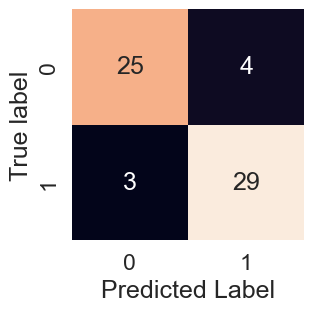

In [43]:
sns.set(font_scale=1.5)

def plot_conf_mat(Y_Test,Y_Preds):
    '''
    Plots nice looking confusion matrix using seaborn's heatmap()
    '''
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(Y_Test,Y_Preds),
                     annot=True,
                     cbar=False)
    plt.ylabel("True label")
    plt.xlabel("Predicted Label")
    
plot_conf_mat(Y_Test,Y_Preds)

In [44]:
print(classification_report(Y_Test,Y_Preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### **Calculating evalutation metrics using cross=validation**

We are going to calculate precision_score,recall_score,f1_score of our model using cross_val_score

In [45]:
# Check the best hyperparameters 
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [46]:
# Create a new classifier with the best parameters
clf = LogisticRegression(C= 0.20433597178569418,
                         solver= 'liblinear')

# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         Y,
                         cv = 5,
                         scoring="accuracy")

cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [47]:
np.mean(cv_acc)

0.8446994535519124

In [48]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         Y,
                         cv = 5,
                         scoring="precision")

cv_precision


array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [49]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         Y,
                         cv = 5,
                         scoring="recall")

cv_recall


array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788])

In [50]:
# Cross-validated f1
cv_f1 = cross_val_score(clf,
                         X,
                         Y,
                         cv = 5,
                         scoring="f1")

cv_f1

array([0.84931507, 0.91176471, 0.88235294, 0.89855072, 0.79452055])

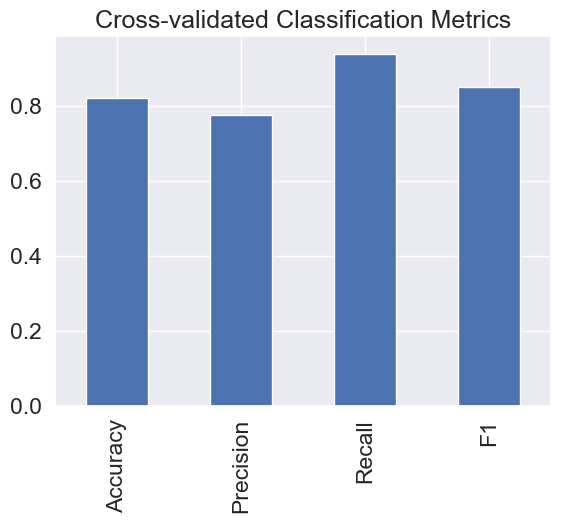

In [56]:
# Visualise the cross-metrics
cv_metrics = pd.DataFrame(
    {
        "Accuracy":cv_acc,
        "Precision":cv_precision,
        "Recall":cv_recall,
        "F1":cv_f1
        })

cv_metrics[:1].T.plot.bar(title="Cross-validated Classification Metrics",
                      legend=False);

### **Feature Importance**

Feature Importance is another way of asking, "Which feature contributed the most to the outcomes of the model and how did they contributed?"

Finding features importance is different for each machine learning model.

Let's find the feature importance for our LogisticRegressionModel

In [57]:
# Fit an instance of LogisticRegressionModel

gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [60]:
clf = LogisticRegression(
    C= 0.20433597178569418, 
    solver= 'liblinear'
)

clf.fit(X_train,Y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [61]:
# Check coef_
clf.coef_

array([[ 0.00316728, -0.86044626,  0.66067051, -0.01156993, -0.00166374,
         0.04386115,  0.31275826,  0.02459361, -0.60413065, -0.5686282 ,
         0.45051623, -0.63609885, -0.67663373]])

In [62]:
# Match coef's feature to coloumns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))

feature_dict

{'age': 0.0031672775125744686,
 'sex': -0.8604462617531493,
 'cp': 0.6606705112737149,
 'trestbps': -0.011569930915493508,
 'chol': -0.0016637441846093658,
 'fbs': 0.04386114942757081,
 'restecg': 0.3127582620910283,
 'thalach': 0.02459361246994142,
 'exang': -0.6041306524707951,
 'oldpeak': -0.568628196677622,
 'slope': 0.4505162332451247,
 'ca': -0.636098853689775,
 'thal': -0.6766337271477075}

<Axes: title={'center': 'Feature Importance'}>

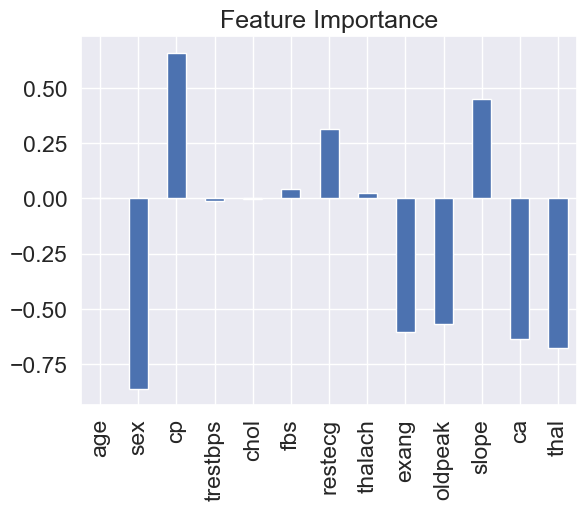

In [64]:
# Visualise the feature importance 
feature_dict = pd.DataFrame(feature_dict,index=[0])
feature_dict.T.plot.bar(title='Feature Importance',
                        legend = False)